In [1]:
# IBM Employee Attrition Analysis

# 📌 Objective
"""
The goal of this notebook is to identify early indicators and patterns that can predict whether an employee is likely to resign. By analyzing the IBM HR dataset using Exploratory Data Analysis (EDA), we aim to highlight key drivers of employee attrition.
"""

'\nThe goal of this notebook is to identify early indicators and patterns that can predict whether an employee is likely to resign. By analyzing the IBM HR dataset using Exploratory Data Analysis (EDA), we aim to highlight key drivers of employee attrition.\n'

In [2]:
# 🔧 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
# 📥 Load Dataset
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv'
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# 📊 Data Overview
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
df.info()
df.describe()
df['Attrition'].value_counts()

Shape of dataset: (1470, 35)

Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionL

,count
Attrition,
No,1233
Yes,237


In [10]:
# 🔍 Null Value Check
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsIn

In [11]:
# 📦 Unique Value Analysis
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


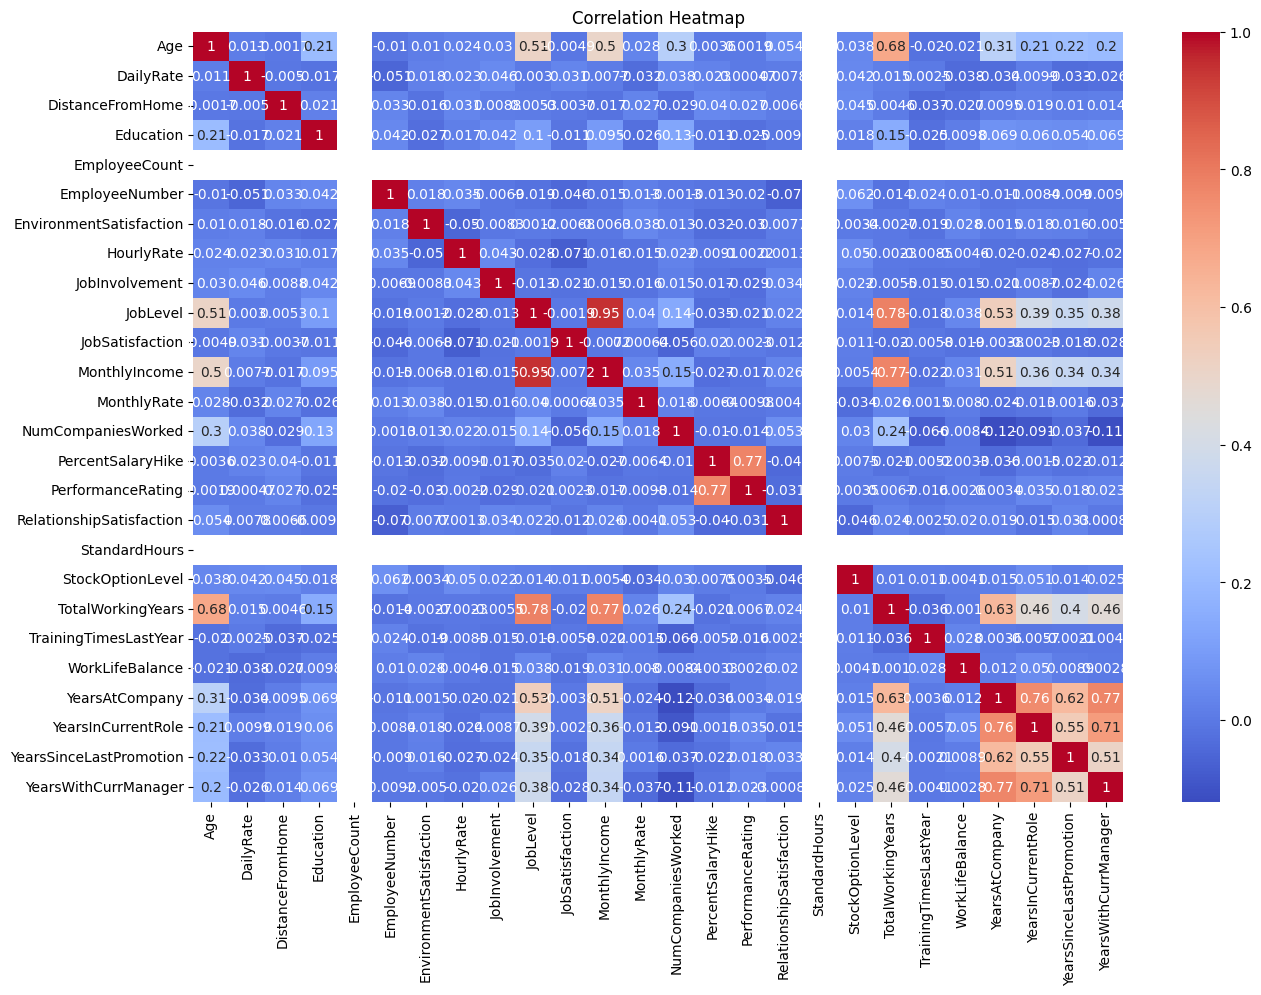

In [25]:
# 📈 Correlation Analysis (Fixed)
plt.figure(figsize=(15,10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # select numeric columns only
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

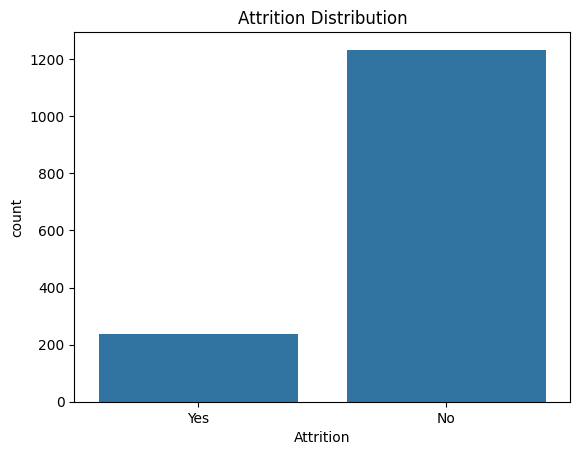

In [13]:
# 📊 Univariate Visual Analysis
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

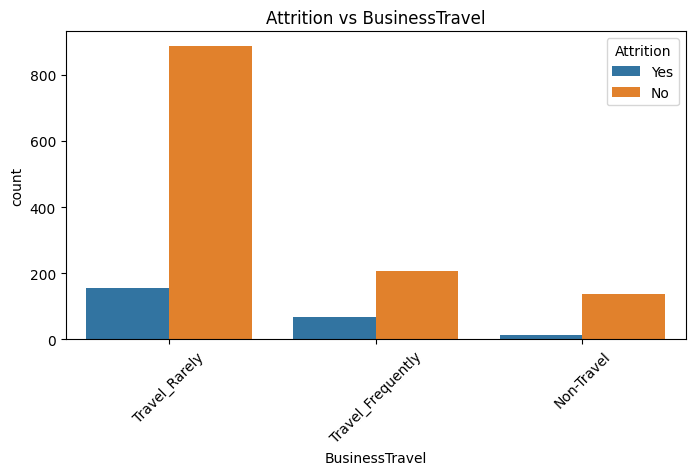

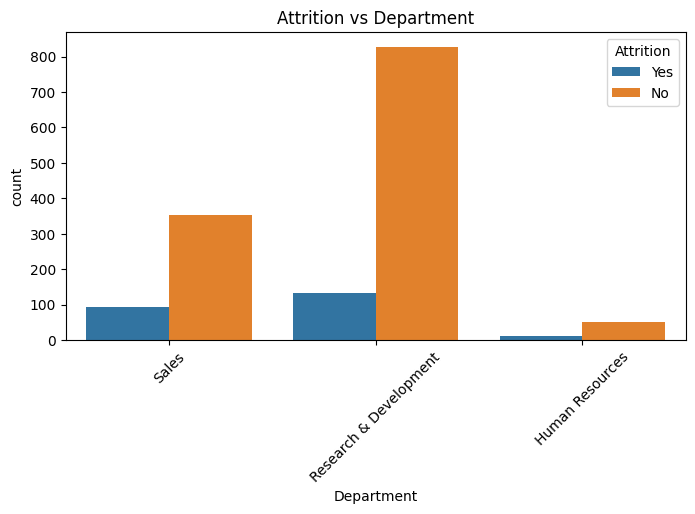

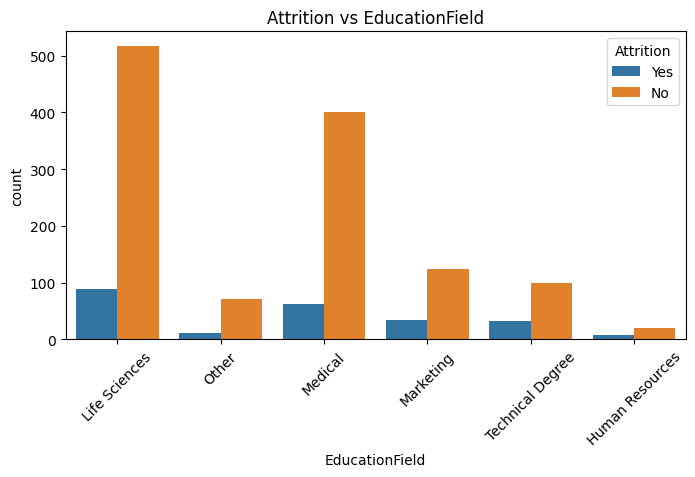

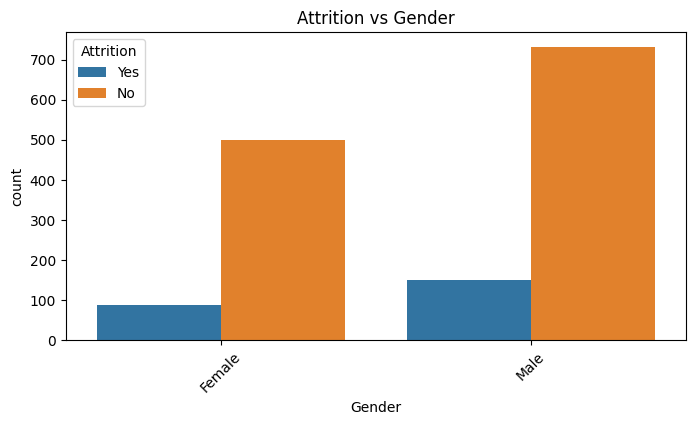

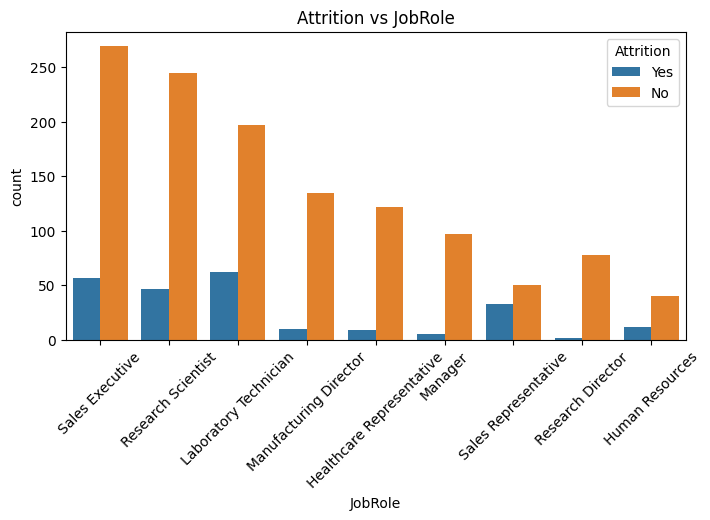

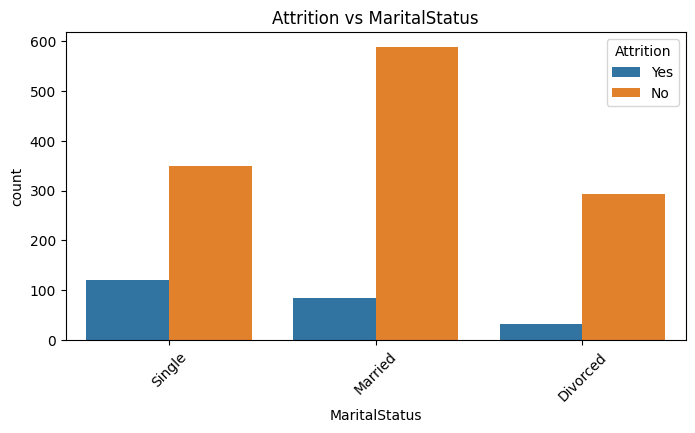

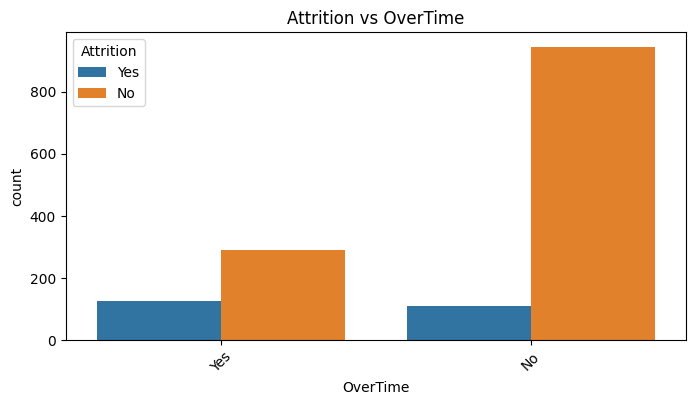

In [14]:
# Visualize key categorical variables
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f"Attrition vs {col}")
    plt.xticks(rotation=45)
    plt.show()

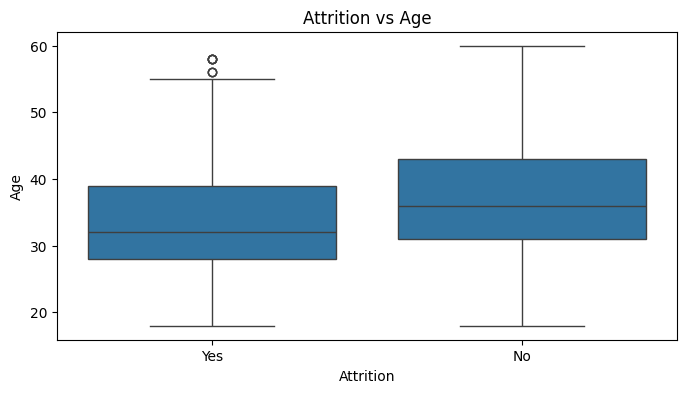

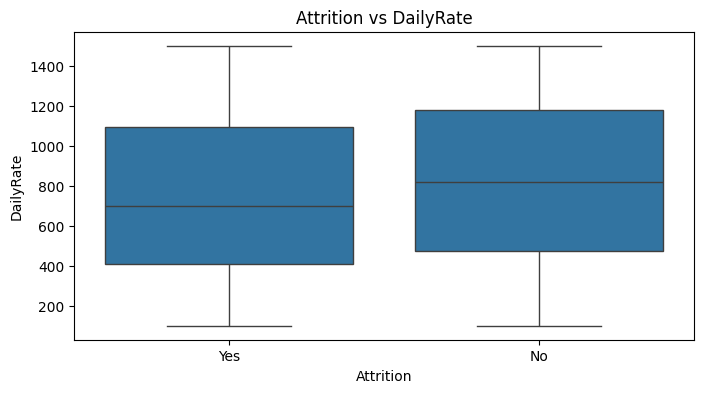

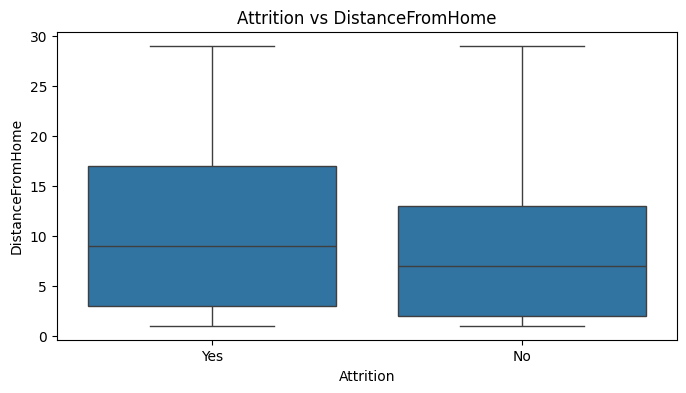

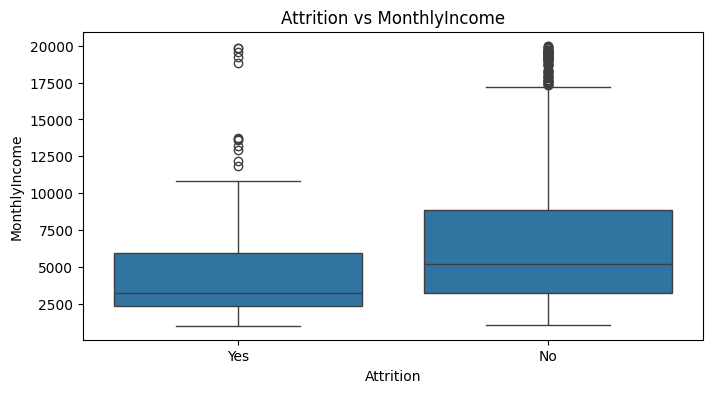

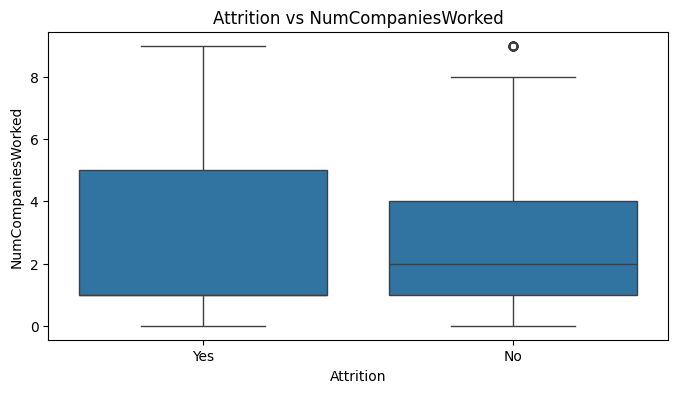

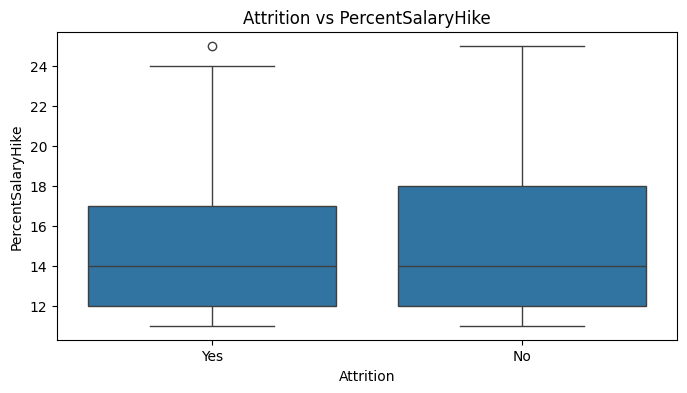

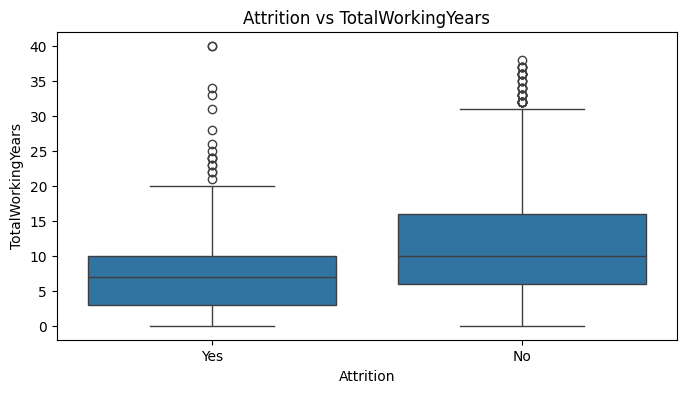

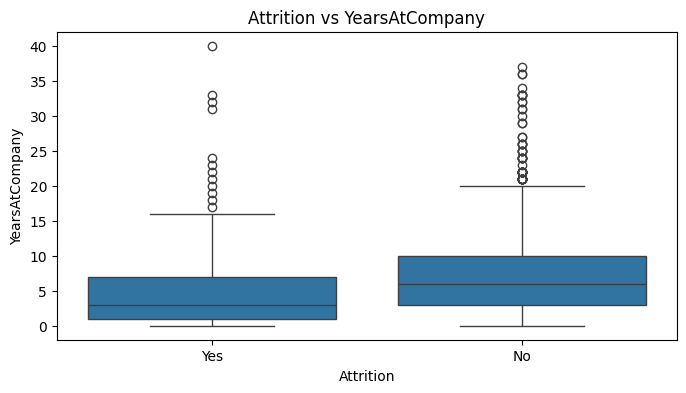

In [15]:
# 📊 Bivariate Analysis - Numerical vs Attrition
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany']

for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f"Attrition vs {col}")
    plt.show()

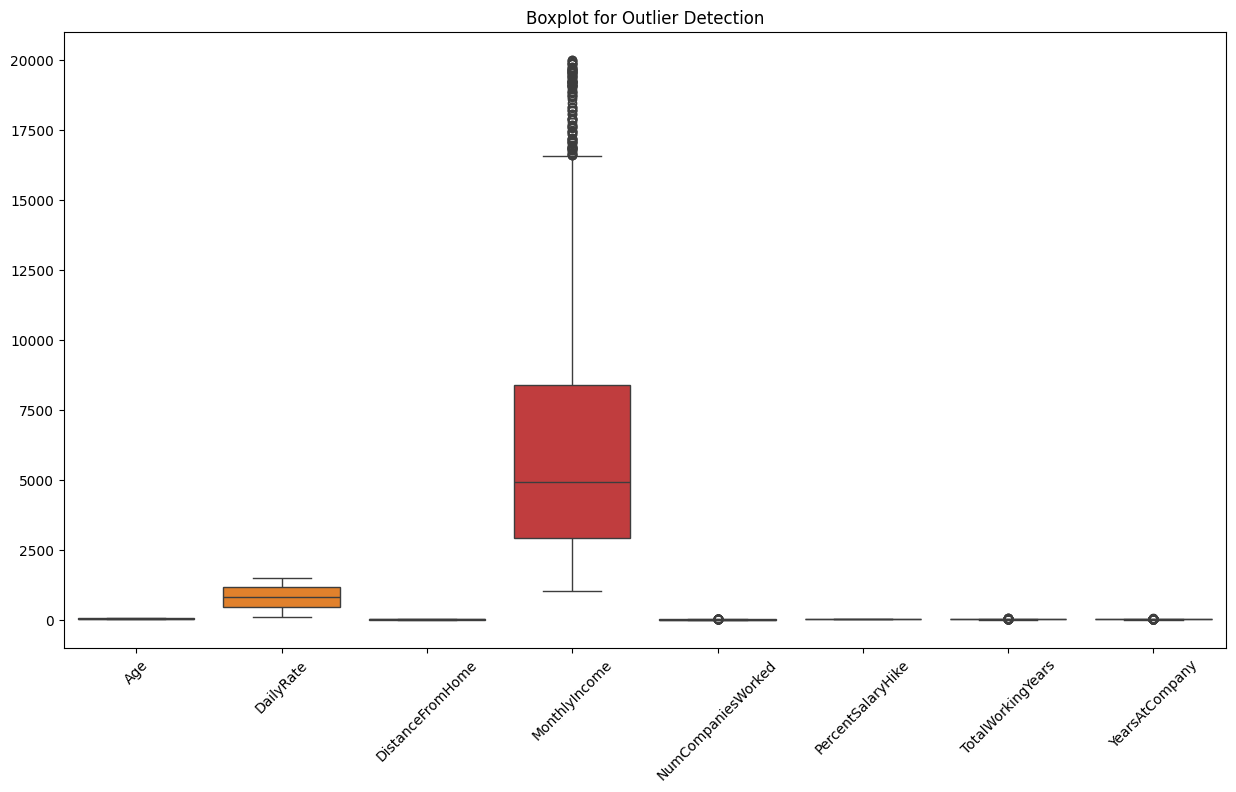

In [16]:
# 📌 Outlier Detection
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [17]:
# 🚦 Feature Importance via Logistic Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [19]:
# Define features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']


In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[248   7]
 [ 34   5]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.42      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.65      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



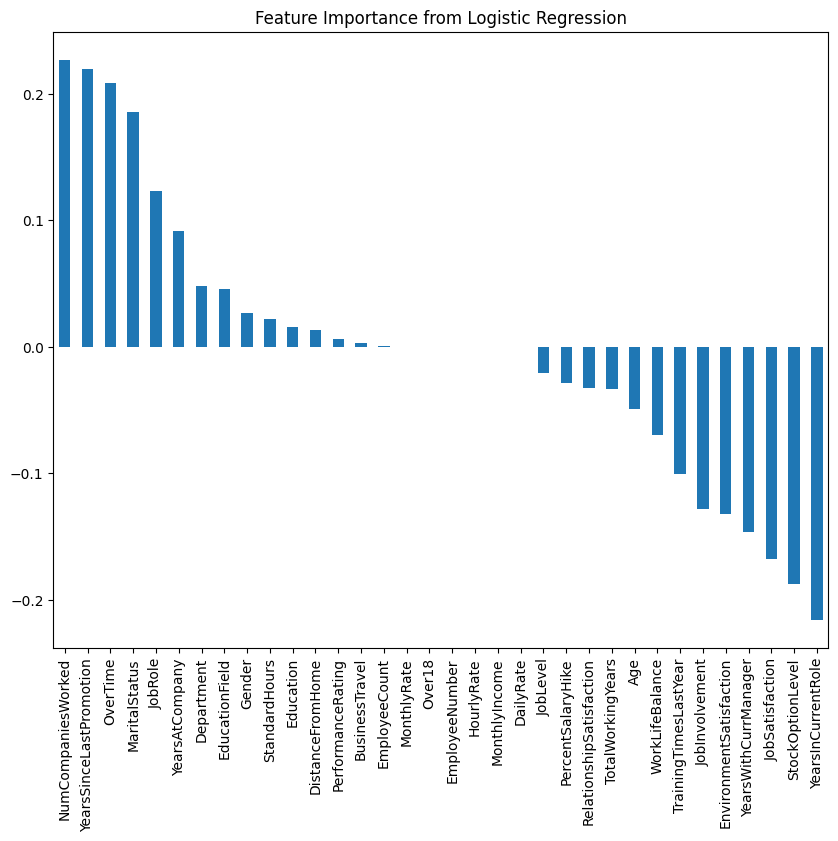

In [23]:
# Feature Importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
importance.plot(kind='bar')
plt.title("Feature Importance from Logistic Regression")
plt.show()


In [24]:
# ✅ Conclusion & Insights
"""
Key Observations:
- Employees who work overtime, have lower income, or stay further from office show higher attrition.
- JobRole and EnvironmentSatisfaction also influence attrition.
- Logistic regression identified 'OverTime', 'JobRole', 'MonthlyIncome' as key predictors.

Next Steps:
- Use these features for more advanced models.
- Recommend HR policy changes targeting high-risk groups.
"""

"\nKey Observations:\n- Employees who work overtime, have lower income, or stay further from office show higher attrition.\n- JobRole and EnvironmentSatisfaction also influence attrition.\n- Logistic regression identified 'OverTime', 'JobRole', 'MonthlyIncome' as key predictors.\n\nNext Steps:\n- Use these features for more advanced models.\n- Recommend HR policy changes targeting high-risk groups.\n"